<a href="https://colab.research.google.com/github/Arpita-rana/project/blob/main/QuantumFakeSmileDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import os
import zipfile
import shutil
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

In [2]:
# Define dataset paths
dataset_paths = {
    "UvA-NEMO": "/content/UvA-NEMO.zip_",
    "BBC": "/content/Bbc.zip_",
    "GENKI": "/content/Genki.zip"
}

In [3]:
# Extract Datasets
def extract_zip(file_path, extract_to):
    if os.path.exists(file_path):
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(extract_to)
        print(f"Extracted {file_path} to {extract_to}")
    else:
        print(f"File {file_path} not found!")


In [4]:
# Extract all datasets
for name, path in dataset_paths.items():
    extract_zip(path, f"/content/{name}")

Extracted /content/UvA-NEMO.zip_ to /content/UvA-NEMO
Extracted /content/Bbc.zip_ to /content/BBC
Extracted /content/Genki.zip to /content/GENKI


In [5]:
for name in dataset_paths.keys():
    extracted_path = f"/content/{name}"
    if os.path.exists(extracted_path):
        print(f"✅ {name} extracted successfully! Listing contents:")
        print(os.listdir(extracted_path))
    else:
        print(f"❌ {name} was NOT extracted! Check the ZIP file.")

✅ UvA-NEMO extracted successfully! Listing contents:
['UvA-NEMO']
✅ BBC extracted successfully! Listing contents:
['BBC']
✅ GENKI extracted successfully! Listing contents:
['kaggle-genki4k']


In [10]:
# import os
# import shutil

# # Define base dataset paths
# datasets_paths = {
#     "genki_smile": "/content/GENKI/kaggle-genki4k/smile",
#     "genki_non_smile": "/content/GENKI/kaggle-genki4k/non_smile",
#     "uva-nemo_smile": "/content/UvA-NEMO/UvA-NEMO/smile_intensities",
#     "bbc_smile": "/content/BBC/BBC/smile_intensities"
# }

# # Define output structure
# output_base = "/content/smile_dataset"
# smiling_dir = os.path.join(output_base, "smiling")
# not_smiling_dir = os.path.join(output_base, "not_smiling")

# # Create directories
# os.makedirs(smiling_dir, exist_ok=True)
# os.makedirs(not_smiling_dir, exist_ok=True)

# # Function to move images to correct folders
# def move_images(source_folder, destination_folder):
#     if os.path.exists(source_folder):
#         for img_file in os.listdir(source_folder):
#             img_path = os.path.join(source_folder, img_file)
#             if os.path.isfile(img_path):
#                 shutil.move(img_path, destination_folder)

# # ✅ Organize GENKI dataset
# move_images(os.path.join(datasets_paths["genki_smile"], "smile"), smiling_dir)
# move_images(os.path.join(datasets_paths["genki_smile"], "non-smile"), not_smiling_dir)

# # ✅ Organize UvA-NEMO dataset (Using smile-intensities folder)
# move_images(datasets_paths["uva-nemo_smile"], smiling_dir)

# # ✅ Organize BBC dataset (Using smile-intensities folder)
# move_images(datasets_paths["bbc_smile"], smiling_dir)

# print("✅ Dataset reorganization complete!")


✅ Dataset reorganization complete!


In [12]:
import os
import shutil

# Define base dataset paths
datasets_paths = {
    "genki_smile": "/content/GENKI/kaggle-genki4k/smile",
    "genki_non_smile": "/content/GENKI/kaggle-genki4k/non_smile",
    "uva-nemo_smile": "/content/UvA-NEMO/UvA-NEMO/smile_intensities",
    "bbc_smile": "/content/BBC/BBC/smile_intensities"
}

# Define output structure
output_base = "/content/smile_dataset"
smiling_dir = os.path.join(output_base, "smiling")
not_smiling_dir = os.path.join(output_base, "not_smiling")

# Create directories
os.makedirs(smiling_dir, exist_ok=True)
os.makedirs(not_smiling_dir, exist_ok=True)

# Function to move images to correct folders
def move_images(source_folder, destination_folder):
    if os.path.exists(source_folder) and os.path.isdir(source_folder):
        files_moved = 0
        for img_file in os.listdir(source_folder):
            img_path = os.path.join(source_folder, img_file)
            if os.path.isfile(img_path):
                shutil.move(img_path, destination_folder)
                files_moved += 1
        print(f"Moved {files_moved} images from {source_folder} to {destination_folder}")
    else:
        print(f"Source folder {source_folder} does not exist or is empty!")

# ✅ Move Smiling Data
move_images(datasets_paths["genki_smile"], smiling_dir)
move_images(datasets_paths["uva-nemo_smile"], smiling_dir)
move_images(datasets_paths["bbc_smile"], smiling_dir)

# ✅ Move Non-Smiling Data (Only from Genki, since UvA-NEMO & BBC lack explicit folders)
move_images(datasets_paths["genki_non_smile"], not_smiling_dir)

# Possible heuristic: If needed, manually classify UvA-NEMO/BBC non-smiling images
print("✅ Dataset reorganization complete!")


Moved 0 images from /content/GENKI/kaggle-genki4k/smile to /content/smile_dataset/smiling
Moved 0 images from /content/UvA-NEMO/UvA-NEMO/smile_intensities to /content/smile_dataset/smiling
Moved 0 images from /content/BBC/BBC/smile_intensities to /content/smile_dataset/smiling
Moved 0 images from /content/GENKI/kaggle-genki4k/non_smile to /content/smile_dataset/not_smiling
✅ Dataset reorganization complete!


In [14]:
# Define transformations (Resize, Normalize, Augment if needed)
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize all images to 128x128
    transforms.ToTensor(),  # Convert images to Tensors
    transforms.Normalize([0.5], [0.5])  # Normalize pixel values
])

# Load datasets
data_dir = "/content/smile_dataset"  # Base directory
dataset = datasets.ImageFolder(root=data_dir, transform=transform)

# Create DataLoader
batch_size = 32
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Check class mapping
print("Class mapping:", dataset.class_to_idx)  # Should show { 'not_smiling': 0, 'smiling': 1 }

Class mapping: {'not_smiling': 0, 'smiling': 1}


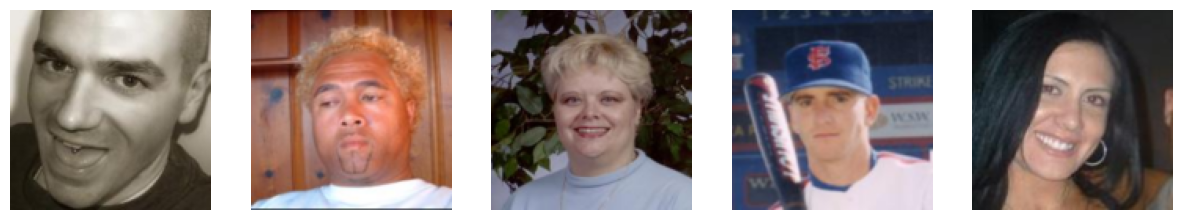

In [16]:
import matplotlib.pyplot as plt
import numpy as np


# Check dataset sample
def show_sample_images(dataloader):
    images, labels = next(iter(dataloader))
    fig, axes = plt.subplots(1, 5, figsize=(15, 5))

    for i in range(5):
        img = images[i].numpy().transpose((1, 2, 0))  # Convert Tensor to NumPy image
        img = img * 0.5 + 0.5  # Unnormalize
        axes[i].imshow(img)
        axes[i].axis('off')

    plt.show()

# Show sample images
show_sample_images(dataloader)

In [17]:
from torch.utils.data import random_split

# Define split ratio
train_size = int(0.8 * len(dataset))  # 80% Training
val_size = len(dataset) - train_size  # 20% Validation

# Split dataset
train_dataset, val_dataset = random_split(dataset, [train_size, val_size])

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

print(f"Training Samples: {len(train_dataset)}, Validation Samples: {len(val_dataset)}")


Training Samples: 3200, Validation Samples: 800
